In [2]:
# header: importing useful modules and functions
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

# Part 1: Modeling the global carbon cycle

CO2 is, unlike most other climate active components, not destroyed by chemical reactions in the atmosphere or deposited on the earth surface, but redistributed within the major carbon reservoirs atmosphere, ocean, land biosphere involving multiple timescales for exchange among and for overturning within these reservoirs. A substantial fraction of the initial perturbation by the emission pulse remains in the atmosphere and the ocean for millennia.

The amount of CO2 in the atmosphere is determined by 3 processes: human activity (fossil fuel combustion, cement production, agriculture, deforestation), the land biosphere and the ocean.
We have processes that emit CO2 in the atmosphere and we have processes that suck CO2 out of the atmosphere, so-called sinks. 
So the CO2 concentration over time is the emissions minus the sinks. Obviously in our current world, the emissions are much larger than the sinks.

Co2/tauCO2 = decay constant

For example, if the decay constant = 0.10/min, then 10% of Co2 at any time will have decayed in the next one minute

To describe how long CO2 stays in the atmosphere we often use an impulse response function (IRF). It mimics the temporal evolution of atmospheric CO2 to a pulse emission of CO2.

What we will do in python is create a simple model that tracks the evolution of CO2 over time. 

## 2. Impulse response function for atmospheric CO2

In [11]:
# definition of the impulse response function for atmospheric CO2
def irf_CO2(t):
    irf =  a_C0 + a_C1 * np.exp(-t/tau_C1) + \
    a_C2 * np.exp(-t/tau_C2) + a_C3 * np.exp(-t/tau_C3)
    return irf

The CO2 concentration is approximated by a sum of exponentially decaying functions, one for each fraction of the additional concentrations, which should reflect the time scales of different sinks.

The coefficients aCO2,i and τCO2,i have no direct, true process-based meaning, but are fitting parameters chosen to represent a given model-based IRFCO2

The aCs are unites coefficients and represent a fraction that is associated with a specific timescale. 
aC0 is the fraction of emissions that remains permanently in the atmosphere

In [12]:
# with the following values of the parameters
a_C0 = 0.2173
a_C1 = 0.2240
a_C2 = 0.2824
a_C3 = 0.2763
tau_C1 = 394.4 #{yr}
tau_C2 = 36.54 #{yr}
tau_C3 = 4.304 #{yr}

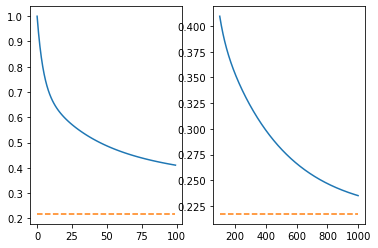

In [13]:
# plot the IRF for atmospheric CO2
plt.figure()
# over the first 100 years
time1 = np.arange(0,100)
plt.subplot(1,2,1)
plt.plot(time1,irf_CO2(time1))
plt.plot(time1,a_C0*np.ones(np.shape(time1)),ls="--")
# up to 1000 years
time2 = np.arange(100,1000)
plt.subplot(1,2,2)
plt.plot(time2,irf_CO2(time2),label="irf_CO2")
plt.plot(time2,a_C0*np.ones(np.shape(time2)),ls="--",label="a_C0")

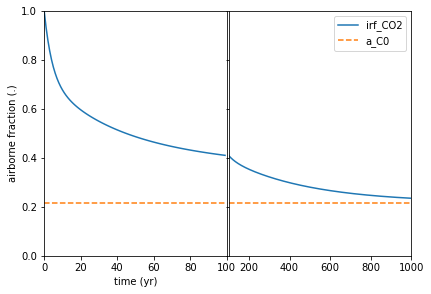

In [14]:

# plot the IRF for atmospheric CO2
plt.figure()
# over the first 100 years
time1 = np.arange(0,100)
plt.subplot(1,2,1)
plt.plot(time1,irf_CO2(time1))
plt.plot(time1,a_C0*np.ones(np.shape(time1)),ls="--")
# up to 1000 years
time2 = np.arange(100,1000)
plt.subplot(1,2,2)
plt.plot(time2,irf_CO2(time2),label="irf_CO2")
plt.plot(time2,a_C0*np.ones(np.shape(time2)),ls="--",label="a_C0")

# polishing the figure
plt.subplot(1,2,1)
plt.axis([0,100,0,1])
plt.xlabel("time (yr)")
plt.ylabel("airborne fraction (.)")
plt.subplot(1,2,2)
plt.axis([100,1000,0,1])
plt.xticks([200,400,600,800,1000])
plt.yticks([0,0.2,0.4,0.6,0.8,1],["","","","","",""])
plt.legend(loc=0)
plt.subplots_adjust(left=0.10,bottom=0.10,right=0.95,top=0.95,wspace=0.01)

1. From an emission pulse, how much CO2 stays in the atmosphere after 10 years, 100 years, 1000 years ?

In [15]:
irf_CO2(10)

0.677540238510535

2. Does this model behave linearly in function of time ? in terms of amplitude ?

In [114]:
# no, it's an exponential decay. 
# Rapid decrease in the first few years after the emission pulse and then a continued but slow decline.

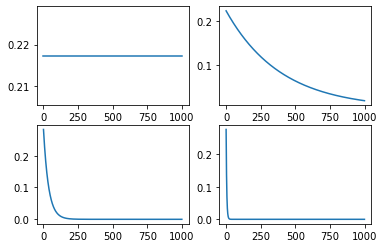

In [17]:
# Individual behaviour of IRF terms
plt.figure()
# over the first 1000 years
time1 = np.arange(0,1000)
plt.subplot(2,2,1)
plt.plot(time1, a_C0+time1*0 )
plt.subplot(2,2,2)
plt.plot(time1, a_C1 * np.exp(-time1/tau_C1) ) 
plt.subplot(2,2,3)
plt.plot(time1, a_C2 * np.exp(-time1/tau_C2) ) 
plt.subplot(2,2,4)
plt.plot(time1, a_C3 * np.exp(-time1/tau_C3) ) 

3. what should be the long-term response of an emission pulse according this model ?

In [18]:
# stay constant at aC0 level

4. According your knowledge, which processes are simulated by the various terms of this equation ?

5. What is the mathemathical relationship between the sink of CO2 and the irf for atmopsheric CO2 ? Determine the formulation of this flux of CO2 and produce a figure.

Text(0.5, 0, 'time (yr)')

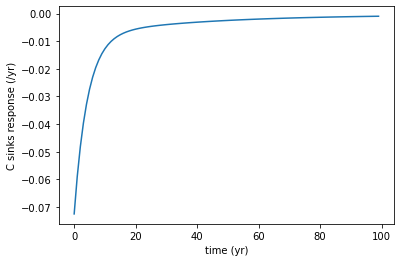

In [19]:
# definition of the carbon sink function
def irf_Csinks(t):
    irf =  -a_C1/tau_C1 * np.exp(-t/tau_C1) - a_C2/tau_C2 * np.exp(-t/tau_C2) - a_C3/tau_C3 * np.exp(-t/tau_C3)
    return irf

### Fig. 2.2 ###
# plot the C sinks response to a pulse of emissions
plt.figure()
time = np.arange(100)
plt.plot(time,irf_Csinks(time))
plt.ylabel('C sinks response (/yr)')
plt.xlabel('time (yr)')

## 3. Simulated historical evolution of atmospheric CO2

Now we know how much CO2 is still airborne or "climate-active" after a certain amount of time. But we’ve been emitting CO2 for a while now, so where are we at, what has been the evolution of CO2 since the industrial revolution?
We have measurements since 1959 from Hawaii. It’s easier to estimate anthropogenic emissions (compared to atmospheric CO2 content). We will use data from the Carbon Dioxide Information Analysis Center on historical emissions with our simple climate model to reconstruct the temporal evolution of atmospheric CO2.
Can we express things as a sum of emerging response of historical forcing?

1. Load in the data
2. 3 approaches to get to the temporal evolution of atmospheric CO2
    1. Use the built-in convolution function of python
    2. Explicitly resolve the convolution
    3. Solve e

In [20]:
# load the historical data on fossil CO2 emissions
EFF_type = np.array([line for line in csv.reader(open("data/CDIAC_EFF.global.1751_2011.csv","r"))] \
[2:],dtype=float)[:,2:-1] / 1000 * 44/12. #{GtCO2/yr} 44/12 is to turn Carbon into CO2, 1000 to turn into Gt
# legend
EFF_lgd = [line for line in csv.reader(open("data/CDIAC_EFF.global.1751_2011.csv","r"))][0][2:-1]
EFF = np.sum(EFF_type,1)

The atomic mass of carbon is 12, while the atomic mass of CO2 is 44. Therefore, to convert from gigatonnes carbon to gigatonnes of carbon dioxide, you simply multiply 44 over 12

In [21]:
EFF_lgd

['Carbon emissions from gas fuel consumption',
 'Carbon emissions from liquid fuel consumption',
 'Carbon emissions from solid fuel consumption',
 'Carbon emissions from cement production',
 'Carbon emissions from gas flaring']

In [22]:
EFF_type.shape

(261, 5)

In [23]:
EFF.shape

(261,)

In [24]:
####### use the IRF to simulate past changes in atmospheric CO$_2$
# conversion factor to convert GtCO2/yr to ppm/yr
k_CO2 = 0.1765 * 44 #{GtCO2/ppm}   

- Co2 emissions: GtCO2
- Co2 concentrations: ppm

In [25]:
# 1. using the built-in convolution function
time = np.arange(len(EFF))
D_CO2_mod1 = 1/k_CO2 * np.convolve(EFF,irf_CO2(time))[:len(time)]


In [26]:
#alternative
# 2. explicitly calculating the convolution (going through each timestep)
D_CO2_mod2 = np.zeros(np.shape(EFF))
for t in range(len(EFF)):
    D_CO2_mod2[t] = 1/k_CO2 * np.sum(EFF[:t+1] * irf_CO2(np.arange(t+1))[::-1]) # [::-1] to turn around the order

In [27]:
# alternative
# 3. using the corresponding box-model
D_CO2_mod3 = np.zeros(np.shape(EFF))
D_C0 = 0
D_C1 = 0
D_C2 = 0
D_C3 = 0
for t in range(len(EFF)):
    D_C0 += a_C0 * EFF[t]
    D_C1 += a_C1 * EFF[t] - D_C1/tau_C1
    D_C2 += a_C2 * EFF[t] - D_C2/tau_C2
    D_C3 += a_C3 * EFF[t] - D_C3/tau_C3
    D_CO2_mod3[t] = 1/k_CO2 * (D_C0+D_C1+D_C2+D_C3)

1. Produce figures corresponding to the three approaches and compare results.

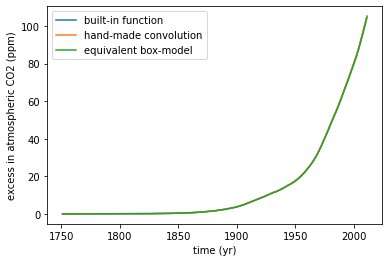

In [28]:
plt.figure()
plt.plot(np.arange(1751,1751+len(EFF)),D_CO2_mod1,label='built-in function')
plt.plot(np.arange(1751,1751+len(EFF)),D_CO2_mod2,label='hand-made convolution')
plt.plot(np.arange(1751,1751+len(EFF)),D_CO2_mod3,label='equivalent box-model')
plt.ylabel('excess in atmospheric CO2 (ppm)')
plt.xlabel('time (yr)')
plt.legend(loc=0)

2. Compare results of each reconstruction of atmospheric CO2 to that used in the last IPCC report (Ciais et al., 2013) :

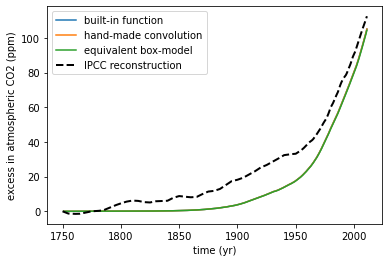

In [29]:
# load atmospheric CO2 reconstruction by IPCC
CO2_ipcc = np.array([line for line in csv.reader(open('data/HistAtmo_IPCC.1750-2011.CO2.csv','r'))],dtype=float)[:,0] #{ppm}

### Fig. 3.2 ###
# compare the three simulated atmospheric CO2 and the reconstruction
plt.figure()
plt.plot(np.arange(1751,1751+len(EFF)),D_CO2_mod1,label='built-in function')
plt.plot(np.arange(1751,1751+len(EFF)),D_CO2_mod2,label='hand-made convolution')
plt.plot(np.arange(1751,1751+len(EFF)),D_CO2_mod3,label='equivalent box-model')
plt.plot(np.arange(1750,1750+len(CO2_ipcc)),CO2_ipcc-CO2_ipcc[0],color='k',lw=2,ls='--',label='IPCC reconstruction')
plt.ylabel('excess in atmospheric CO2 (ppm)')
plt.xlabel('time (yr)')
plt.legend(loc=0)

3. Identify missing processes : A better fit would imply greated sources of CO2 or greater sink of CO2 ?

In [30]:
# greater sources -> land-use change (deforestation etc)

## 4. Improved representation of atmospheric CO2

In [ ]:
# skipped this part

2. Compare the result to the estimated from Le Quéré et al. (2013), available using the following code :

In [36]:
# load historical emissions from land-use change
ELUC_data = np.array([line for line in csv.reader(open("data/GCP+_ELUC.global.1850_2010.csv","r"))] ,dtype=float)[:,0] / 1000 * 44/12. #{GtCO2/yr}

# Analysis of IPCC/CMIP5 Earth system model results

## 1 An introduction to the climate sensitivity at the equili- brium (ECS)

Climate Sensitivity Metrics


- TCR (global mean surface warming at the time of doubling CO2 in an idealized 1% per year CO2 increase experiment, but more generally it quantifies the warming in response to a changing fgorcing prior to deep ocean being in equilibrium with the forcing) 1-2.5°C
-> temperature response on the timescale of 10-100 years
- ECS (warming response to doubling CO2 in the atmosphere realtive to pre-industrial cliamte, after the climate reached its new equilibrium, taking into account changes in water vapour, lapse rate, clouds and surface albedo) It takes thousands of years for the ocean to reach a new equilibrium. By that time, long-term Earth system feedbacks are fixed in these model simulations. 1.5-4.5°
-> 100-1,000 years
- ESS (Earth System Sensitivity) Includes earth system feedbacks (changes in ice sheets and vegetation, and feedbacks between cliamte and biogeochemical cycles -> further affect climate)
-> 100,000 years


In [40]:
# ancillary lists for loading data
model_list = ["ACCESS-10","ACCESS-13","BCC-CSM-11",\
"BCC-CSM-11m","CanESM2","CCSM4","CNRM-CM5",\
"CNRM-CM5-2","CSIRO-Mk360","GFDL-CM3","GFDL-ESM2G",\
"GFDL-ESM2M","GISS-E2-H","GISS-E2-R",\
"HadGEM2-ES","IPSL-CM5A-LR","IPSL-CM5A-MR",\
"IPSL-CM5B-LR","MIROC5","MIROC-ESM","MPI-ESM-LR",\
"MPI-ESM-MR","MPI-ESM-P","MRI-CGCM3","NorESM1-M"]

# some models run their simulation longer than others
model_length = {"ACCESS-10":150,"ACCESS-13":151,"BCC-CSM-11":150,\
"BCC-CSM-11m":150,"CanESM2":150,\
"CCSM4":151,"CNRM-CM5":150,"CNRM-CM5-2":140,\
"CSIRO-Mk360":150,"GFDL-CM3":150,"GFDL-ESM2G":300,\
"GFDL-ESM2M":300,"GISS-E2-H":151,"GISS-E2-R":151,\
"HadGEM2-ES":151,"IPSL-CM5A-LR":260,\
"IPSL-CM5A-MR":140,"IPSL-CM5B-LR":160,"MIROC5":151,\
"MIROC-ESM":150,"MPI-ESM-LR":150,"MPI-ESM-MR":150,\
"MPI-ESM-P":150,"MRI-CGCM3":150,"NorESM1-M":150}

# create array of final variables
# tas in {degC}; rsdt,rlut,rsut in {W/m2}

In [41]:
for var in ["tas","rsdt","rsut","rlut"]:
    exec(var+"_ctrl = np.zeros((300,len(model_list)),) * np.nan")
    exec(var+"_quad = np.zeros((300,len(model_list)),) * np.nan")


In [42]:
# load pre-processed CMIP5 results
for mod in model_list:
    for sim in ['ctrl','quad']:
        TMP = np.array([line for line in csv.reader(open('data/Climate_CMIP5/Climate_'+mod+'.'+sim+'_global.csv','r'))][1:],dtype=float)
        lgd = [line for line in csv.reader(open('data/Climate_CMIP5/Climate_'+mod+'.'+sim+'_global.csv','r'))][0]
        for var in ['tas','rsdt','rsut','rlut']:
            exec(var+'_'+sim+'[:len(TMP),model_list.index(mod)] = TMP[:,lgd.index(var)]')

1. For all models, present on two seperate figures the time series of tas and rsut. The code can start with the following commands :

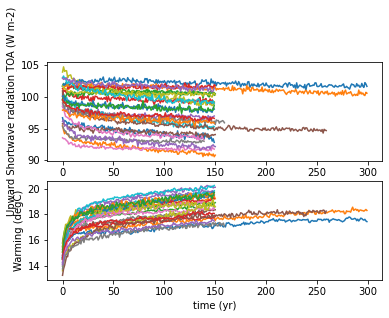

In [43]:
plt.figure()
plt.subplot(2,1,1)
for mod in model_list:
    m = model_list.index(mod)
   # plt.plot((netrad_quad-netrad_ctrl)[:,m])
    plt.plot((rsut_quad)[:,m])
    plt.xlabel('time (yr)')
    plt.ylabel('Upward Shortwave radiation TOA (W m-2)')

plt.subplot(2,1,2)
for mod in model_list:
    m = model_list.index(mod)
    plt.plot((tas_quad)[:,m])
    plt.xlabel('time (yr)')
    plt.ylabel('Warming (degC)')

3. Propose a new figure to better represent this relationship. Note that ctrl simulation can be used to define the unperturbed state of the climate.

In [45]:
# show deviation of control run instead of absolute values

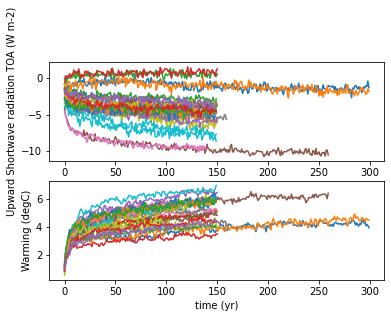

In [46]:
plt.figure()
plt.subplot(2,1,1)
for mod in model_list:
    m = model_list.index(mod)
   # plt.plot((netrad_quad-netrad_ctrl)[:,m])
    plt.plot((rsut_quad-rsut_ctrl)[:,m])
    plt.xlabel('time (yr)')
    plt.ylabel('Upward Shortwave radiation TOA (W m-2)')

plt.subplot(2,1,2)
for mod in model_list:
    m = model_list.index(mod)
    plt.plot((tas_quad-tas_ctrl)[:,m])
    plt.xlabel('time (yr)')
    plt.ylabel('Warming (degC)')

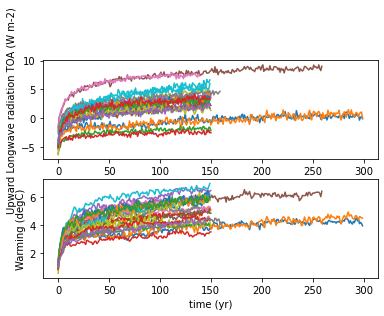

In [47]:
# RLUT vs TEMPERATURE
plt.figure()
plt.subplot(2,1,1)
for mod in model_list:
    m = model_list.index(mod)
   # plt.plot((netrad_quad-netrad_ctrl)[:,m])
    plt.plot((rlut_quad-rlut_ctrl)[:,m])
    plt.xlabel('time (yr)')
    plt.ylabel('Upward Longwave radiation TOA (W m-2)')

plt.subplot(2,1,2)
for mod in model_list:
    m = model_list.index(mod)
    plt.plot((tas_quad-tas_ctrl)[:,m])
    plt.xlabel('time (yr)')
    plt.ylabel('Warming (degC)')

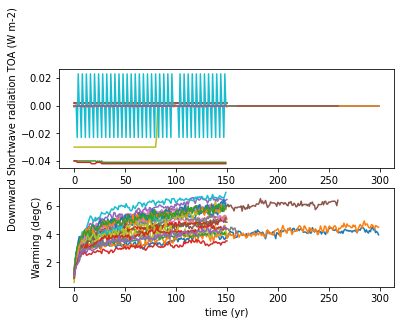

In [48]:
# RSDT vs TEMPERATURE
plt.figure()
plt.subplot(2,1,1)
for mod in model_list:
    m = model_list.index(mod)
   # plt.plot((netrad_quad-netrad_ctrl)[:,m])
    plt.plot((rsdt_quad-rsdt_ctrl)[:,m])
    plt.xlabel('time (yr)')
    plt.ylabel('Downward Shortwave radiation TOA (W m-2)')

plt.subplot(2,1,2)
for mod in model_list:
    m = model_list.index(mod)
    plt.plot((tas_quad-tas_ctrl)[:,m])
    plt.xlabel('time (yr)')
    plt.ylabel('Warming (degC)')

#### Ultimate improvement of illustration

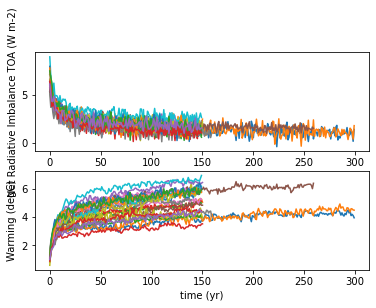

In [49]:
# create net radiative budget variable
netrad_ctrl = rsdt_ctrl - rsut_ctrl - rlut_ctrl
netrad_quad = rsdt_quad - rsut_quad - rlut_quad

# Compute Radiative Imbalance and Warming
netImbalance = netrad_quad - netrad_ctrl
Warming      = tas_quad- tas_ctrl


# NET IMBALANCE vs TEMPERATURE
plt.figure()
plt.subplot(2,1,1)
for mod in model_list:
    m = model_list.index(mod)
    plt.plot(netImbalance[:,m])
    plt.xlabel('time (yr)')
    plt.ylabel('Net Radiative Imbalance TOA (W m-2)')

plt.subplot(2,1,2)
for mod in model_list:
    m = model_list.index(mod)
    plt.plot(Warming[:,m])
    plt.xlabel('time (yr)')
    plt.ylabel('Warming (degC)')


-> radiative imbalance is similar but warming is not -> models react differently to a change in forcing! 

radiative imbalance = net energy uptake by the system

Next steps:
   - Calculate the ECS for each of these CMIP5 models
   - We will see that cliamte sensitivity differs depending on the time horizon that you look at (see figure on the PDF)
   - We will create an equation for surface temperature as a funtion of time based on our knowledge of climate sensitivty in these models
   - Deduct past temperature change from past forcing
   - Get future temperature change from future forcing

## Gregory's analysis

1. On the previous figure, is there a way to determine the ECS ?

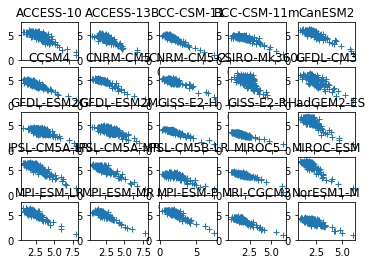

In [42]:
### Figure ###
# plot temperature vs. radiative budget
plt.figure()
for mod in model_list:
    m = model_list.index(mod)
    plt.subplot(5,5,m+1)
    plt.plot(netImbalance[:,m],Warming[:,m],marker='+',ls='none')
    plt.ylim(0,7.5)
    plt.title(mod)

scatter around the straight line comes from internal variability in the cliamte system

In [50]:
# The ECS is reached when the radiative imbalance has reached a steady state (meaning around 0) 
# -> fit a linear line to find the y-intercept
# This is the ECS of 4xCO2. The standard ECS measurement is done for 2xCO2

# by calculating the cliamte feedback parameter we can deduce the climate sensitivity of 2xCO2

2. Below is a set of lines to compute the ECS. Compare the 2 approaches.

In [55]:
# fit equilibrium temperature change

# the function fmin finds the solution for coeff and T4x that minimize the error of the linear fit 
# coeff is the slope
# T4x is the y-intercept
coeff = np.zeros(len(model_list))
T4x = np.zeros(len(model_list))   # T4x is an estimate of the ECS of 4xCO2
for mod in model_list:
    m = model_list.index(mod)
    length = model_length[mod] 
    def err(var):
        D_T = var[0] * (netImbalance[:length,m]) + var[1]
        #print(netImbalance[:length,m]) # shape is (300, 25) :length constricts it to the length of the specific model
        return sum(( D_T - (Warming)[:length,m] )**2)
    [coeff[m],T4x[m]] = fmin(err,[-1.,3.],disp=False)
    
    # -1,3 = initital guesses -> then the function finds those that minimize the error of the linear fit

In [56]:
T4x # y-intercept

array([6.80544292, 6.31591852, 5.46736618, 5.25594917, 6.93325878,
       5.57569676, 6.31344336, 6.34374572, 6.57833664, 6.98902324,
       4.60400857, 4.75241028, 4.61533179, 4.07920988, 8.27666765,
       7.66955239, 7.71088536, 4.73937817, 5.10718194, 8.69624236,
       6.87727491, 6.60644013, 6.59355988, 4.98181134, 5.06044148])

In [57]:
coeff # slope -> climate sensitivity parameter

array([-0.91509689, -0.8970517 , -0.74401879, -0.55177982, -0.78986605,
       -0.69921584, -0.78327052, -0.69997877, -0.86425314, -0.91293057,
       -0.56100368, -0.56307821, -0.54262599, -0.48663797, -1.17408428,
       -1.0565563 , -1.03943205, -0.65514183, -0.48386103, -0.88906272,
       -0.71938047, -0.70708154, -0.66606938, -0.66163306, -0.65106038])

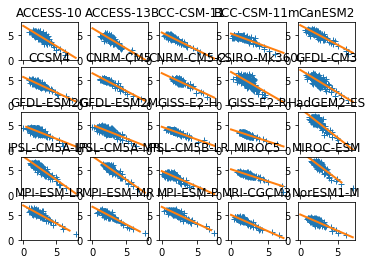

In [58]:
### Fig. 7b ###
# show fit on previous figure
plt.figure()
for mod in model_list:
    m = model_list.index(mod)
    plt.subplot(5,5,m+1)
    plt.plot(netImbalance[:,m],Warming[:,m],marker='+',ls='none')
    plt.ylim(0,7.5)
    # generate a fit for a net imbalance range of 0 to 7 W m-2
    plt.plot(np.arange(0,8),coeff[m]*np.arange(0,8)+T4x[m],lw=2)    # mx+b
    plt.title(mod)

3. Based on this analysis, do you think that another method (quadratic, cubic...) could out-perform a linear fit proposed by Gregory et al. (2004) ?

In [59]:
# Yes, because a constant lambda (climate feedback parameter) leads to an ECS estimate that is biased low
# An exponential fit would be better

You can see that in all models the climate has not reached the steady state yet (netImbalance=0), so for these short runs a linear approach works. But for longer model runs and models that have processes like the deep ocean reaction resolved in it a linear fit would not work (see Figure a)

1. What is the ECS / climate sensitivity parameter in K[Wm2]−1 of each model, considering that canonical ECS is given for a doubling of CO2.

Climate sensitivity parameter = equilibrium change in the annual mean global surface temperature following a unit change in radiatve forcing

In [60]:
# deduce climate sensitivity parameter
lambda_ = T4x / (5.35*np.log(4))

# 5.35*np.log(4) -> way to calculate the RF of CO2 

In [61]:
lambda_ 

array([0.9175868 , 0.85158358, 0.73717216, 0.70866652, 0.93482038,
       0.75177851, 0.85124985, 0.85533556, 0.88696576, 0.94233918,
       0.62076452, 0.64077371, 0.62229124, 0.55000522, 1.11595396,
       1.03409581, 1.03966879, 0.63901658, 0.68860804, 1.17252577,
       0.927272  , 0.89075499, 0.88901833, 0.67170416, 0.68230596])

ECS = F2x * lambda 

In [63]:
ECS = (5.35*np.log(2))*lambda_

(array([1., 5., 3., 2., 3., 4., 3., 2., 0., 2.]),
 array([2.03960494, 2.27045656, 2.50130819, 2.73215981, 2.96301144,
        3.19386306, 3.42471468, 3.65556631, 3.88641793, 4.11726956,
        4.34812118]),
 <BarContainer object of 10 artists>)

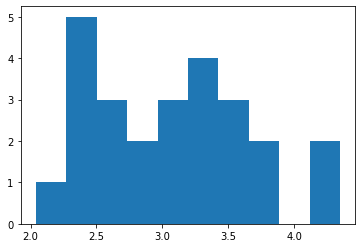

In [64]:
plt.hist(ECS)

### 1.3 Investigate time variation of cliamte sensitivity

In [86]:
# Skipped this part

Knutti et al., 2017 (see Figure in pdf) show that ECS varies across time scales. Here, we will perform this analysis across available CMIP5 models and try to characterize this phenomenon.

1. Using a conceptual model (e.g., exponential), fit the evolution of the ECS estimates across a range of time-scales.

## 2 Detection & Attribution of climate change

Now that we know the relationship between forcing and temeprature for each model, we can determine surface temperature as a function of time

1. Using the code for Gregory's approach, determine the 4 parameters aT,1, aT,2, τT,1 and τT,2. Check if the computation matches the graphical analysis.

Equation of tas as a function of time

In [66]:
# fit dynamical parameters
a_T1 = np.zeros(len(model_list))
tau_T1 = np.zeros(len(model_list))
tau_T2 = np.zeros(len(model_list))
for mod in model_list:
    m = model_list.index(mod)
    length = model_length[mod] #!!!
    time = np.arange(0,length)+0.5
    def err(var):
        D_T = T4x[m] * (1 - var[0]*np.exp(-time/var[1]) - (1-var[0])*np.exp(-time/var[2]))
        return sum(( D_T - (tas_quad-tas_ctrl)[:length,m] )**2)  # RMSE (Sum of error squared)
    [a_T1[m],tau_T1[m],tau_T2[m]] = fmin(err,[0.5,2,200],disp=False)
a_T2 = 1-a_T1

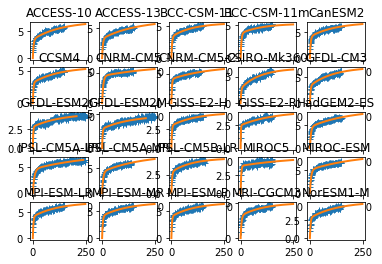

In [67]:
### Fig. 8 ###
# plot fit of climate response
plt.figure()
for mod in model_list:
    m = model_list.index(mod)
    plt.subplot(5,5,m+1)
    plt.plot((tas_quad-tas_ctrl)[:,m],marker='+',ls='none')    
    plt.plot(T4x[m]*(1 - a_T1[m]*np.exp(-np.arange(250)/tau_T1[m]) - a_T2[m]*np.exp(-np.arange(250)/tau_T2[m])),lw=2)
    plt.title(mod)

Text(0, 0.5, 'global temperature change (K)')

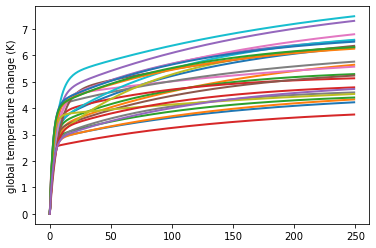

In [68]:
### Fig. X ###
# show IRFs
plt.figure()
for mod in model_list:
    m = model_list.index(mod)
    plt.plot(T4x[m]*(1 - a_T1[m]*np.exp(-np.arange(250)/tau_T1[m]) - a_T2[m]*np.exp(-np.arange(250)/tau_T2[m])),lw=2)
plt.ylabel('global temperature change (K)')

2. Determine the derivative of Equation 5 to get the irf for surface temperature. Develop a code to compute the irf for each CMIP5 model.

The derivative gives the rate of change of the original function

IRF has no unit -> it's a fraction 

In [71]:
# derivative
irf_TAS = lambda t: lambda_[m] * (a_T1[m]/tau_T1[m]*np.exp(-t/tau_T1[m]) + a_T2[m]/tau_T2[m]*np.exp(-t/tau_T2[m]))

Text(0.5, 0, 'years')

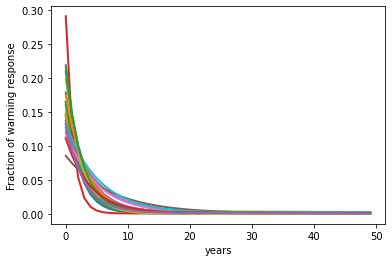

In [72]:
plt.figure()
for mod in model_list:
    m = model_list.index(mod)
    plt.plot(irf_TAS(np.arange(0,50)),lw=2)
plt.ylabel('Fraction of warming response')
plt.xlabel('years')

## 2.2 Attributed changes in tas

Deduct past tas from forcing timeseries

In [73]:
# load the historical data on radiative forcing by IPCC
RF_comp = np.array([line for line in csv.reader(open('data/Historic_IPCC.1750-2011.RF.csv','r'))][1:],dtype=float)[:,:] #{W/m2}
RF_comp[:,-1] *= 0.7 # arbitrary climate efficiency for volcanoes
RF_lgd = [line for line in csv.reader(open('data/Historic_IPCC.1750-2011.RF.csv','r'))][0]
RF_all = np.sum(RF_comp,1)


1. Using one of the convolution methods as well as the previous dataset, determine change in surface temperature as simulated by each CMIP5 model.

In [75]:
# simulate historical change in temperature
D_TAS_all = np.zeros([len(RF_all),len(model_list)])
time = np.arange(len(RF_all))
for mod in model_list:
    m = model_list.index(mod)
    irf_TAS = lambda t: lambda_[m] * (a_T1[m]/tau_T1[m]*np.exp(-t/tau_T1[m]) + a_T2[m]/tau_T2[m]*np.exp(-t/tau_T2[m]))
    D_TAS_all[:,m] = np.convolve(RF_all,irf_TAS(time))[:len(time)]

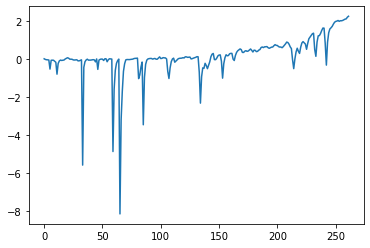

In [76]:
plt.plot(RF_all)

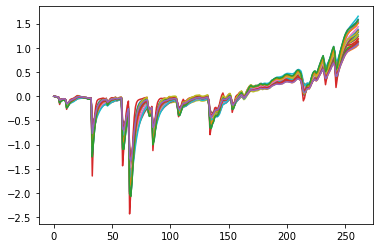

In [77]:
plt.plot(D_TAS_all)

2. Compare these simulations to that observed since 1880. In order to compare changes in surface temperature, one uses 1900-1920 as a reference period. That is, we will analyse temperature anomaly with the respect to the 1900-1920 average. Observed data of global mean surface temperature can be loaded using :

In [78]:
# load temperature reconstructions by NASA/GISS
GMT_giss = np.array([line for line in csv.reader(open('data/HistClim_GISS.1880-2014.gmt.csv','r'))],dtype=float)[:,0] #{degC}

Text(0, 0.5, 'global temperature change (K)')

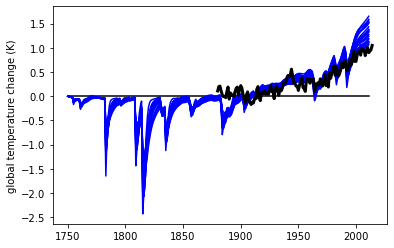

In [79]:
### Fig. 9a ###
# compare simulated past temperature change with observations
plt.figure(-2)
plt.plot(np.arange(1750,2012),np.zeros(2012-1750),'k-')
plt.plot(np.arange(1750,1750+len(D_TAS_all)),D_TAS_all,color='b')
plt.plot(np.arange(1880,1880+len(GMT_giss)),GMT_giss-np.mean(GMT_giss[20:40]),color='k',lw=3)
plt.ylabel('global temperature change (K)')


3. Repeat the previous computation keeping solely (1) natural forcings [last column of
RF_comp] or (2) anthropogenic forcings. Present figures from each analyses.

-> Temperature increase is the result of which forcing?

In [82]:
# repeat with natural only
RF_nat = np.sum(RF_comp[:,-2:],1)
D_TAS_nat = np.zeros([len(RF_nat),len(model_list)])
time = np.arange(len(RF_nat))
for mod in model_list:
    m = model_list.index(mod)
    irf_TAS = lambda t: lambda_[m] * (a_T1[m]/tau_T1[m]*np.exp(-t/tau_T1[m]) + a_T2[m]/tau_T2[m]*np.exp(-t/tau_T2[m]))
    D_TAS_nat[:,m] = np.convolve(RF_nat,irf_TAS(time))[:len(time)]

In [83]:
# repeat with anthropogenic only
RF_ant = np.sum(RF_comp[:,:-2],1)
D_TAS_ant = np.zeros([len(RF_ant),len(model_list)])
time = np.arange(len(RF_ant))
for mod in model_list:
    m = model_list.index(mod)
    irf_TAS = lambda t: lambda_[m] * (a_T1[m]/tau_T1[m]*np.exp(-t/tau_T1[m]) + a_T2[m]/tau_T2[m]*np.exp(-t/tau_T2[m]))
    D_TAS_ant[:,m] = np.convolve(RF_ant,irf_TAS(time))[:len(time)]   

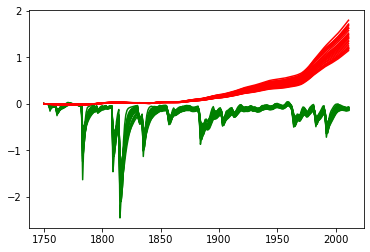

In [84]:
### Fig. 9b ###  
# add new simulations to previous figure
plt.figure()
plt.plot(np.arange(1750,1750+len(D_TAS_nat)),D_TAS_nat,color='g')
plt.plot(np.arange(1750,1750+len(D_TAS_ant)),D_TAS_ant,color='r')

4. Discuss the cause of climate change based on this analysis in the light of the proposed decomposition of observed forcings and previous section.

In [85]:
# Natural variability is not the cause of the temperature increase we're seeing

# 3. Analysis of future climate change projections

In [86]:
# load RCP radiative forcing scenarios
for rcp in ['26','45','60','85','60to45','45to26']:
    TMP = np.array([line for line in csv.reader(open('data/Scen_RCP'+rcp+'.2000-2500.RF.csv','r'))][1:],dtype=float)[:,:] #{W/m2}
    TMP[:,-2] *= 0.7 # arbitrary climate efficiency for volcanoes
    exec('RF_rcp'+rcp+' = np.sum(TMP,1)')

1. Display time series of radiative forcing from 1750 to 2500 using historical data and future projections.

In [87]:
TMP.shape

(501, 19)

In [88]:
RF_all.shape

(262,)

In [89]:
RF_rcp26.shape

(501,)

In [90]:
time_past = np.arange(1750, 1750+len(RF_all))
time_future = np.arange(2000, 2000+len(RF_rcp26))

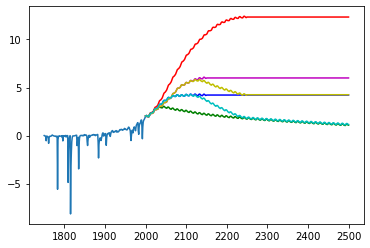

In [91]:
color_dico = {'26':'g','45':'b','60':'m','85':'r','60to45':'y','45to26':'c'}
plt.plot(time_past, RF_all)
for rcp in ['26','45','60','85','60to45','45to26']:
    exec('plt.plot(time_future,RF_rcp'+rcp+',color=color_dico[rcp])')

2. Future projections start in 2000 and radiative forcing between projection of historical data slightly differ. Write a code in order to ensure continuity in radiative forcing between historical and projections (hint : use RFall).

Text(0, 0.5, 'radiative forcing (W/m2)')

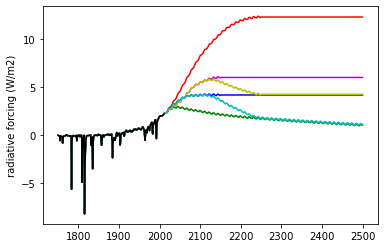

In [92]:
# combine historical and projection RF
for rcp in ['26','45','60','85','60to45','45to26']:
    exec('RF_proj'+rcp+' = np.zeros([2500-1750+1])')
    exec('RF_proj'+rcp+'[:261+1] = RF_all[:]')
    exec('RF_proj'+rcp+'[261+1:] = RF_rcp'+rcp+'[12:] + RF_all[261] - RF_rcp'+rcp+'[11]')  

### Fig. X ###
# plot timeseries of RF for RCP scenarios
color_dico = {'26':'g','45':'b','60':'m','85':'r','60to45':'y','45to26':'c'}
plt.figure(9)
for rcp in ['26','45','60','85','60to45','45to26']:
    exec('plt.plot(np.arange(1750,1750+len(RF_proj'+rcp+')),RF_proj'+rcp+',color=color_dico[rcp])')
plt.plot(np.arange(1750,1750+len(RF_all)),RF_all,color='k')
plt.ylabel('radiative forcing (W/m2)')

3. For each projection, estimate change in surface temperature. Display the results on a figure.

In [94]:
# temperature change projections
for rcp in ['26','45','60','85','60to45','45to26']:
    exec('D_TAS_proj'+rcp+' = np.zeros([len(RF_proj'+rcp+'),len(model_list)])')
    exec('time = np.arange(len(RF_proj'+rcp+'))')
    for mod in model_list:
        m = model_list.index(mod)
        irf_TAS = lambda t: lambda_[m] * (a_T1[m]/tau_T1[m]*np.exp(-t/tau_T1[m]) + a_T2[m]/tau_T2[m]*np.exp(-t/tau_T2[m]))
        exec('D_TAS_proj'+rcp+'[:,m] = np.convolve(RF_proj'+rcp+',irf_TAS(time))[:len(time)]')

Text(0, 0.5, 'global temperature change (deg C)')

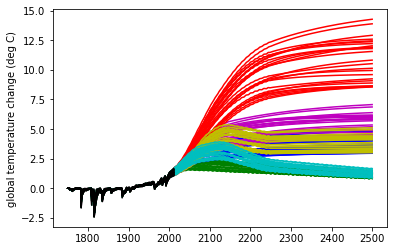

In [95]:
### Fig. 10 ###
# plot timeseries of projected temperature change under RCP scenarios
plt.figure(10)
for rcp in ['26','45','60','85','60to45','45to26']:
    exec('plt.plot(np.arange(1750,1750+len(D_TAS_proj'+rcp+')),D_TAS_proj'+rcp+',color=color_dico[rcp])')
plt.plot(np.arange(1750,1750+len(D_TAS_all)),D_TAS_all,color='k')
plt.ylabel('global temperature change (deg C)')

4. Discuss the results, focus on the difference between models as well as the difference between projections.

# Part 3: Investigating the contribution of various greenhouse gases

In [96]:
# IRF for surface temperature in response to a pulse emission which has been established by Boucher et Reddy (2008)
# climate IRF used in IPCC AR5
def irf_GMT(t):
    irf = 0.631/8.4*np.exp(-t/8.4) + 0.429/409.5*np.exp(-t/409.5)
    return irf

1. Using the equation, determine the climate sensitivity of that response.

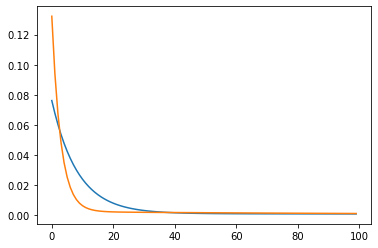

In [97]:
plt.plot(irf_GMT(np.arange(100)))
plt.plot(irf_TAS(np.arange(100)))

2. Compare this latter to the previous results derived from CMIP5 models.


3. Implement the function in Python in order to compute AGW P and AGT P for CH4 and CO2 for a time horizon ranging from 0 to 500 years.
Hint : We can assume that for methane change in radiative forcing responds linearly to rising CH4 concentration (called radeff). In the last IPCC report, Myrhe et al. (2013a) use the following set of parameters :

In [98]:
# parameters
# CH4
tau_CH4 = 12.4 #{yr}
radeff_CH4 = 3.63E-4 #{W/m2 / ppb}
k_CH4 = k_CO2 * 16/44. #{TgCH4 / ppb}
# CO2
radeff_CO2 = 1.37E-5 #{W/m2 / ppb}

In [101]:
# create functions for CH4
def irf_CH4(t):
    irf = np.exp(-t/tau_CH4)
    return irf

def AGWP_CH4(TH):
    RF = radeff_CH4 * 1/k_CH4 * irf_CH4(np.arange(TH+1))
    AGWP = np.sum(RF)
    return AGWP #{W/m2 yr /TgCH4}
    
def AGTP_CH4(TH):
    RF = radeff_CH4 * 1/k_CH4 * irf_CH4(np.arange(TH+1))
    D_T = np.convolve(RF,irf_GMT(np.arange(TH+1)))[:TH+1]
    AGTP = D_T[TH]
    return AGTP #{K /TgCH4}

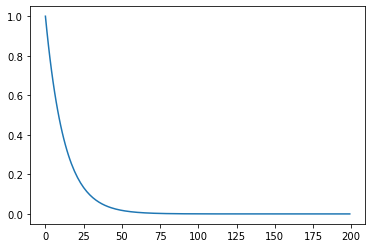

In [102]:
plt.plot(irf_CH4(np.arange(200)))

In [103]:
# create functions for CO2
def AGWP_CO2(TH):
    RF = radeff_CO2 * 1/k_CO2 * irf_CO2(np.arange(TH+1))
    AGWP = np.sum(RF)
    return AGWP #{W/m2 yr /TgCO2}
    
def AGTP_CO2(TH):
    RF = radeff_CO2 * 1/k_CO2 * irf_CO2(np.arange(TH+1))
    D_T = np.convolve(RF,irf_GMT(np.arange(TH+1)))[:TH+1]
    AGTP = D_T[TH]
    return AGTP #{K /TgCO2}

In [104]:
# use function to calculate AGWPs and AGTPs
AGWP_CO2_th = np.zeros(500)
AGWP_CH4_th = np.zeros(500)
AGTP_CO2_th = np.zeros(500)
AGTP_CH4_th = np.zeros(500)
for th in range(500):
    AGWP_CO2_th[th] = AGWP_CO2(th)
    AGWP_CH4_th[th] = AGWP_CH4(th)
    AGTP_CO2_th[th] = AGTP_CO2(th)
    AGTP_CH4_th[th] = AGTP_CH4(th)    

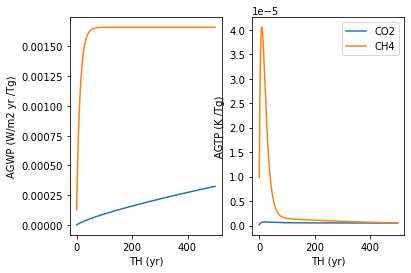

In [105]:
### Fig. 11 ###
# plot absolute metrics for CO2 and CH4
plt.figure(11)
plt.subplot(1,2,1)
plt.plot(AGWP_CO2_th,label='CO2')
plt.plot(AGWP_CH4_th,label='CH4')
plt.xlabel('TH (yr)')
plt.ylabel('AGWP (W/m2 yr /Tg)')
plt.subplot(1,2,2)
plt.plot(AGTP_CO2_th,label='CO2')
plt.plot(AGTP_CH4_th,label='CH4')
plt.xlabel('TH (yr)')
plt.ylabel('AGTP (K /Tg)')
plt.legend(loc=0)

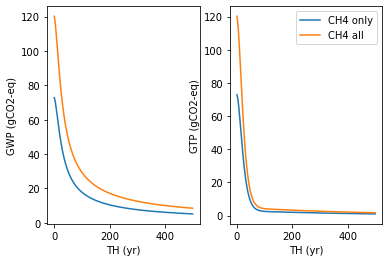

In [106]:
### Fig. 12 ###
# plot normalized metrics for CH4
plt.figure(12)
plt.subplot(1,2,1)
plt.plot(AGWP_CH4_th/AGWP_CO2_th,label='CH4 only')
plt.plot((1+0.5+0.15)*AGWP_CH4_th/AGWP_CO2_th,label='CH4 all')
plt.xlabel('TH (yr)')
plt.ylabel('GWP (gCO2-eq)')
plt.subplot(1,2,2)
plt.plot(AGTP_CH4_th/AGTP_CO2_th,label='CH4 only')
plt.plot((1+0.5+0.15)*AGTP_CH4_th/AGTP_CO2_th,label='CH4 all')
plt.xlabel('TH (yr)')
plt.ylabel('GTP (gCO2-eq)')
plt.legend(loc=0)

### 2 Assessing the GWP and GTP for other chemical species

1. Please characterize these chemical species (gas or aerosols, natural or anthropogenic, long-lived or short-lived species).

In [107]:
# parameters
# N2O
tau_N2O = 121. #{yr}
radeff_N2O = 3.00E-3 #{W/m2 / ppb}
k_N2O = k_CO2 * 44/44. #{TgN2O / ppb}
# SF6
tau_SF6 = 3200. #{yr}
radeff_SF6 = 0.57 #{W/m2 / ppb}
k_SF6 = k_CO2 * 146/44. #{TgSF6 / ppb}
# SO2
tau_SO2 = 0.01 #{yr}
radeff_SO2 = -0.55 #{W/m2 / TgSO2}
# BC
tau_BC = 0.02 #{yr}
radeff_BC = 2.82 #{W/m2 / TgBC}

1. Display the GWP and GTP for the various species.

In [108]:
# create functions for N2O
def irf_N2O(t):
    irf = np.exp(-t/tau_N2O)
    return irf

def AGWP_N2O(TH):
    RF = radeff_N2O * 1/k_N2O * irf_N2O(np.arange(TH+1))
    AGWP = np.sum(RF)
    return AGWP #{W/m2 yr /TgN2O}
    
def AGTP_N2O(TH):
    RF = radeff_N2O * 1/k_N2O * irf_N2O(np.arange(TH+1))
    D_T = np.convolve(RF,irf_GMT(np.arange(TH+1)))[:TH+1]
    AGTP = D_T[TH]
    return AGTP #{K /TgN2O}

In [109]:
# create functions for SF6
def irf_SF6(t):
    irf = np.exp(-t/tau_SF6)
    return irf

def AGWP_SF6(TH):
    RF = radeff_SF6 * 1/k_SF6 * irf_SF6(np.arange(TH+1))
    AGWP = np.sum(RF)
    return AGWP #{W/m2 yr /TgSF6}
    
def AGTP_SF6(TH):
    RF = radeff_SF6 * 1/k_SF6 * irf_SF6(np.arange(TH+1))
    D_T = np.convolve(RF,irf_GMT(np.arange(TH+1)))[:TH+1]
    AGTP = D_T[TH]
    return AGTP #{K /TgSF6}

In [110]:
# create functions for SO2
def irf_SO2(t):
    irf = np.exp(-t/tau_SO2)
    return irf

def AGWP_SO2(TH):
    RF = radeff_SO2 * irf_SO2(np.arange(TH+1))
    AGWP = np.sum(RF)
    return AGWP #{W/m2 yr /TgSO2}
    
def AGTP_SO2(TH):
    RF = radeff_SO2 * irf_SO2(np.arange(TH+1))
    D_T = np.convolve(RF,irf_GMT(np.arange(TH+1)))[:TH+1]
    AGTP = D_T[TH]
    return AGTP #{K /TgSO2}

In [111]:
# create functions for BC
def irf_BC(t):
    irf = np.exp(-t/tau_BC)
    return irf

def AGWP_BC(TH):
    RF = radeff_BC * irf_BC(np.arange(TH+1))
    AGWP = np.sum(RF)
    return AGWP #{W/m2 yr /TgBC}
    
def AGTP_BC(TH):
    RF = radeff_BC * irf_BC(np.arange(TH+1))
    D_T = np.convolve(RF,irf_GMT(np.arange(TH+1)))[:TH+1]
    AGTP = D_T[TH]
    return AGTP #{K /TgBC}

In [112]:
# use function to calculate AGWPs and AGTPs
AGWP_N2O_th = np.zeros(500)
AGWP_SF6_th = np.zeros(500)
AGWP_SO2_th = np.zeros(500)
AGWP_BC_th = np.zeros(500)
AGTP_N2O_th = np.zeros(500)
AGTP_SF6_th = np.zeros(500)
AGTP_SO2_th = np.zeros(500)
AGTP_BC_th = np.zeros(500)
for th in range(500):
    AGWP_N2O_th[th] = AGWP_N2O(th)
    AGWP_SF6_th[th] = AGWP_SF6(th)
    AGWP_SO2_th[th] = AGWP_SO2(th)
    AGWP_BC_th[th] = AGWP_BC(th)
    AGTP_N2O_th[th] = AGTP_N2O(th)
    AGTP_SF6_th[th] = AGTP_SF6(th)
    AGTP_SO2_th[th] = AGTP_SO2(th)
    AGTP_BC_th[th] = AGTP_BC(th)     

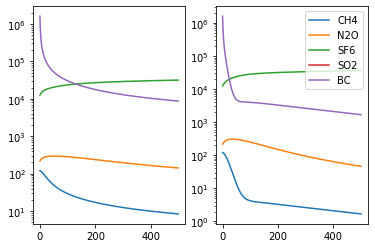

In [113]:
### Fig. 13 ###
# plot all emission metrics
plt.figure()
ax = plt.subplot(1,2,1)
plt.plot((1+0.5+0.15)*AGWP_CH4_th/AGWP_CO2_th,label='CH4')
plt.plot(AGWP_N2O_th/AGWP_CO2_th,label='N2O')
plt.plot(AGWP_SF6_th/AGWP_CO2_th,label='SF6')
plt.plot(AGWP_SO2_th/AGWP_CO2_th,label='SO2')
plt.plot(AGWP_BC_th/AGWP_CO2_th,label='BC')
ax.set_yscale('log')
ax = plt.subplot(1,2,2)
plt.plot((1+0.5+0.15)*AGTP_CH4_th/AGTP_CO2_th,label='CH4')
plt.plot(AGTP_N2O_th/AGTP_CO2_th,label='N2O')
plt.plot(AGTP_SF6_th/AGTP_CO2_th,label='SF6')
plt.plot(AGTP_SO2_th/AGTP_CO2_th,label='SO2')
plt.plot(AGTP_BC_th/AGTP_CO2_th,label='BC')
plt.legend(loc=0)
ax.set_yscale('log')

2. Using a log-scale representation, compare GWP and GTP.

3. Discuss the potential limitation of this metrics.